# Write a Data Science Blog Post - Udacity Data Scientist Nanodegree

The goal of this project is to understand the data from the Stackoveflow Survey from 2020 to answer the questions defined in the first step of the **CRISP-DM**: the **Business Understanding**.

## Business Understanding

The question I am interested to answer by studying the data is: 

**With a low formal education and no experience in Software Development, which programming languages should I study to earn more and what's the salary I can aim at if I want to move to the United States?**

While studying data to answer the main question, I've tried to answer the sub-questions below:  

* What languages were most popular in 2020 worldwide?
* Should I learn the most popular languages to earn more?
* Do you need a high formal education to aim at a high salary in Software Development?
* As a software developer with low formal education, what could be your salary in United States?

None of the above questions require the **Modeling** phase, because they can find the answer by using a descriptive analysis.

## Data Understanding

First, I import all the libraries used in the study of the data to make sure I can work easily with the Dataset and the related graphs. Then, I retrieve the data from a CSV file downloaded from [Kaggle](https://www.kaggle.com/aitzaz/stack-overflow-developer-survey-2020).

The output of the cell below helps to have an idea of the data contained in the Dataset.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

df = pd.read_csv('./Archive/StackOverflowSurvey_2020/developer_survey_2020/survey_results_public.csv')
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


Below are the number of surveys, the countries and the number of representatives for each country.

In [12]:
#How many people took part to the survey?
df.shape[0]

64461

In [52]:
#Which countries took part to the survey?
#NaN values are dropped to remove them from the list of Countries
countries_set = set(df['Country'].dropna())
countries_set

{'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo, Republic of the...',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte d'Ivoire",
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong (S.A.R.)',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'I

In [53]:
#How many countries took part to the survey?
len(countries_set)

183

For convenience, I get all the columns available in the Dataset to figure out what features I can use to answer the main question defined in the **Business Understanding** phase.

In [7]:
df.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

The column aboute the **Programming Languages** used at work by each person is a list separated with a ";" character, as shown below.

In [8]:
df['LanguageWorkedWith'].head()

0      C#;HTML/CSS;JavaScript
1            JavaScript;Swift
2    Objective-C;Python;Swift
3                         NaN
4           HTML/CSS;Ruby;SQL
Name: LanguageWorkedWith, dtype: object

Instead of leaving the Dataset as is, I create dummies columns for each **Programming Language**. This approach will make the Dataset more readable and it will help to study the data based on the **Programming Languages** known and used at work by the Software Developers who replied to the survey.

In [19]:
df_prog_lang_dummies = pd.concat([df, df['LanguageWorkedWith'].str.get_dummies(sep=';')], axis=1)
df_prog_lang_dummies

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,Perl,Python,R,Ruby,Rust,SQL,Scala,Swift,TypeScript,VBA
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,0,0,0,0,0,0,0,0,0,0
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,0,0,0,0,0,0,0,1,0,0
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,0,1,0,0,0,0,0,1,0,0
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,0,0,0,0,0,0,0,0,0,0
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,0,0,0,1,0,1,0,0,0,0
5,6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,...,0,0,0,0,0,0,0,0,0,0
6,7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,...,0,0,0,0,0,0,0,0,0,0
7,8,I am a developer by profession,Yes,36.0,12,Yearly,116000.0,116000.0,United States,United States dollar,...,0,1,0,0,0,1,0,0,0,0
8,9,I am a developer by profession,No,30.0,20,NaN,NaN,NaN,Tunisia,United States dollar,...,0,0,0,0,0,0,0,0,0,0
9,10,I am a developer by profession,Yes,22.0,14,Yearly,25000.0,32315.0,United Kingdom,Pound sterling,...,0,1,0,0,0,1,0,0,0,0


Moreover, I'm interested in getting a set of the **Programming Languages** people used in the survey to understand which of them are more common and which pay higher. 

In [22]:
programming_languages_set = set(df['LanguageWorkedWith'].str.get_dummies(sep=';').columns)
programming_languages_set

{'Assembly',
 'Bash/Shell/PowerShell',
 'C',
 'C#',
 'C++',
 'Dart',
 'Go',
 'HTML/CSS',
 'Haskell',
 'Java',
 'JavaScript',
 'Julia',
 'Kotlin',
 'Objective-C',
 'PHP',
 'Perl',
 'Python',
 'R',
 'Ruby',
 'Rust',
 'SQL',
 'Scala',
 'Swift',
 'TypeScript',
 'VBA'}

### Most Popular Programming Languages in 2020

Below are the **Programming Languages** ordered from the most used from the least used for work among the software developers who replied to the survey from all over the world.

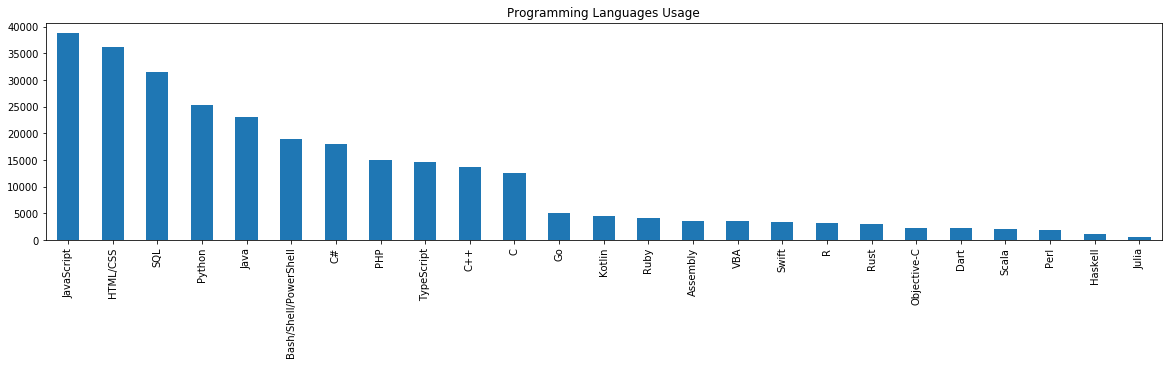

In [29]:
programing_language_usage_mean_series = df_prog_lang_dummies[programming_languages_set].sum()
plt.figure(figsize=(20,4))
plt.title("Programming Languages Usage")
(programing_language_usage_mean_series.sort_values(ascending=False)).plot(kind="bar");

Now that we know which are the most used programming languages, we should put in the shoes of someone who wants to figure out which are the highest paying ones if the main goal is to earn a high salary as a Software Developer. And we come to the next question.

### Should I learn the most popular languages to aim at a high salary?

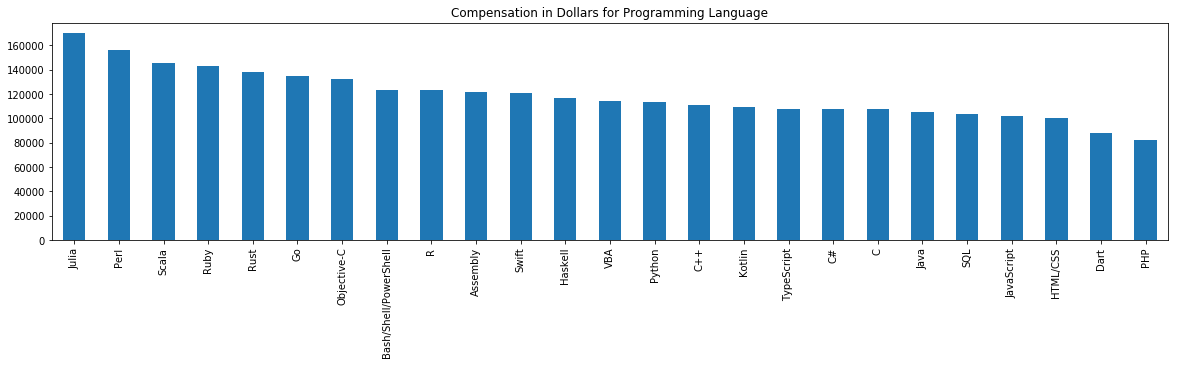

In [49]:
#Let's find the Compensation in Dollars for each Programming Language
d_converted_comp_by_prog_lang_mean = {}
for lang in programming_languages_set:
    d_converted_comp_by_prog_lang_mean[lang] = df_prog_lang_dummies[df_prog_lang_dummies[lang] == 1].groupby(lang, as_index=False)['ConvertedComp'].mean()['ConvertedComp'][0]

plt.figure(figsize=(20,4))
plt.title("Compensation in Dollars for Programming Language")
pd.Series(d_converted_comp_by_prog_lang_mean)
(pd.Series(d_converted_comp_by_prog_lang_mean).sort_values(ascending=False)).plot(kind="bar");

What data suggests is pretty clear. The **Salary** seems almost inversely proportional to the popularity of a **Programming Language**. However, this isn't surprising because it's the law of supply and demand. The less are the software developers capable of writing code with a specific **Programming Language** the more they can ask for a higher **Salary**.

Now, considering the Persona we defined in the **Business Understanding**, another question we have to answer is related to the chances to have a high **Salary** for people who had to stop their educatio process at **Primary/Elementar School**. Should thei give up in advance? Let's see what the data says.

### Do you need a high formal education to aim at a high salary in Software Development?

In [54]:
#What's the mean value for the Converted Compensation based on the Education Level?
#Rows with a NaN value in the EdLevel are dropped because we can't know the correct education level of that person, and we can't aproximate it to an indicative value
education_group_df = df_prog_lang_dummies.dropna(subset=['EdLevel']).groupby(['EdLevel'])['ConvertedComp'].mean()
education_group_df

EdLevel
Associate degree (A.A., A.S., etc.)                                                   106815.832192
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          107638.145312
I never completed any formal education                                                104351.616883
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       103104.775496
Other doctoral degree (Ph.D., Ed.D., etc.)                                            122849.059545
Primary/elementary school                                                             114752.679739
Professional degree (JD, MD, etc.)                                                     72062.004193
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     79067.561392
Some college/university study without earning a degree                                 97895.641703
Name: ConvertedComp, dtype: float64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

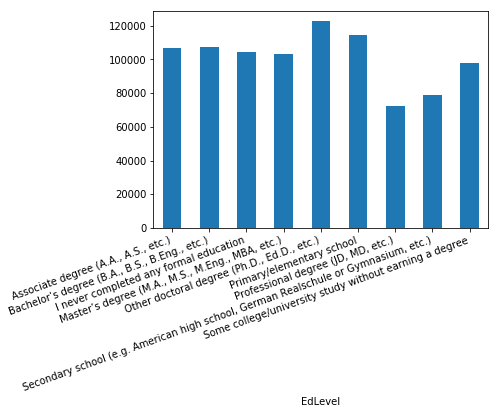

In [34]:
education_group_df.plot(kind='bar')
plt.xticks(rotation=20, ha='right')

Data says that, all over the world, if we consider the mean **Salary** in the **Education Level** categories showed in the figure above, higher **Salaries** are recorded for Software Developers with a **Doctoral Degree** and **Primary/Elementary School**.

Now we should take one last step. In fact, our Persona, would also like to know the **salary** that it's possible to aim at once in the **United States**, with all the considerations we made above.  

### As a software developer with low formal education, what could be your salary in United States?

In [75]:
#Dataframe of Software Developers in the United States with an Education Level = Primary/Elementary school?
united_states_df = df_prog_lang_dummies[df_prog_lang_dummies['Country'] == 'United States']
united_states_primary_elementary_df = united_states_df[united_states_df['EdLevel'] == 'Primary/elementary school']

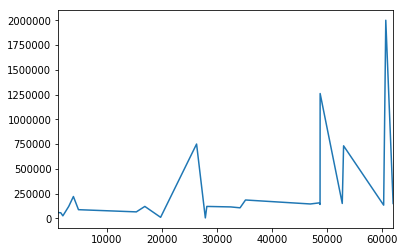

In [78]:
#Figure of the Salaries for Software Developers in US who stopped their formal education at Primary/Elementary School who filled out the field in the Survey 
#Rows with NaN value in the ConvertedComp are dropped because we are studying the ConvertedComp field, and aproximating the missing values to the mean value wouldn't add any value, and setting them to 0 would bring the mean value close to 0. 
united_states_primary_elementary_df = united_states_primary_elementary_df.dropna(subset=['ConvertedComp'])
united_states_primary_elementary_df['ConvertedComp'].plot()

In [79]:
united_states_primary_elementary_df['ConvertedComp'].describe()

count    2.400000e+01
mean     2.877917e+05
std      4.660236e+05
min      4.000000e+03
25%      8.165000e+04
50%      1.265000e+05
75%      1.632500e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

The analysys shows an important **Standard Deviation** in the data. Unfortunately, we don't know if it's because of an error in filling out the field, but if we consider these data as valid, we could say to our Persona that it's possible to earn a mean Salary of 287.791$ per year in the United States with an Education Level till the Primary/Elementary School.